# Data preprocessing

In [54]:
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch
import os

## Extract for team-based data

Extract table(s), how ever many you want

In [55]:
# List XML files
xml_files = [
    "/Users/hungduong/Documents/MSBA UofU/MSBA 3rd/Soccer Analytics/Utah State/Washington State Cougars - Utah St. Aggies 0-1 (Team-based).xml"
   
]

all_rows = []

for file in xml_files:
    tree = ET.parse(file)
    root = tree.getroot()

    # Extract match name from filename (remove .xml)
    match_name = os.path.splitext(os.path.basename(file))[0]

    # Extract all instance elements
    instances = root.find("ALL_INSTANCES").findall("instance")

    for inst in instances:
        row = {
            'match_name': match_name,  # New column for match name
            'ID': inst.findtext('ID'),
            'code': inst.findtext('code'),
            'start': inst.findtext('start'),
            'end': inst.findtext('end')
        }

        players = []
        for label in inst.findall('label'):
            group = label.findtext('group')
            text = label.findtext('text')

            if group == '10 - Players':
                players.append(text)
            else:
                row[group] = text

        row['10 - Players'] = ', '.join(players)
        all_rows.append(row)

# Convert to DataFrame
team_data = pd.DataFrame(all_rows)

# Convert numeric columns
numeric_cols = [
    '11 - Start location X',
    '12 - Start location Y',
    '13 - Duration',
    '15 - End location X',
    '16 - End location Y'
]

for col in numeric_cols:
    if col in team_data.columns:
        team_data[col] = pd.to_numeric(team_data[col], errors='coerce')

team_data.reset_index(drop=True, inplace=True)

In [56]:
team_data.head(10)

,match_name,ID,code,start,end,01 - Location third,02 - Location flank,03 - End location third,04 - End location flank,05 - Length,...,11 - Start location X,12 - Start location Y,13 - Duration,14 - Formation,15 - End location X,16 - End location Y,10 - Players,08 - Transition,07 - Outcome,09 - xG
0,Washington State Cougars - Utah St. Aggies 0-1 (Team-based),1,Ball in play,8.533709,17.520936,Middle third,Center,Final third,Center,Short,...,51.0,35.0,8.0,4-2-1-3,6.0,34.0,"7. Chambers, 14. Diamond, 12. Werts",NaN,NaN,NaN
1,Washington State Cougars - Utah St. Aggies 0-1 (Team-based),2,Utah St. Aggies - Possessions,8.533709,17.520936,Middle third,Center,Final third,Center,Short,...,51.0,35.0,8.0,4-2-1-3,6.0,34.0,"7. Chambers, 14. Diamond, 12. Werts",NaN,NaN,NaN
2,Washington State Cougars - Utah St. Aggies 0-1 (Team-based),3,Utah St. Aggies - Crosses,8.533709,17.520936,Middle third,Center,Final third,Center,Short,...,51.0,35.0,8.0,4-2-1-3,6.0,34.0,"7. Chambers, 14. Diamond, 12. Werts",NaN,NaN,NaN
3,Washington State Cougars - Utah St. Aggies 0-1 (Team-based),4,Ball in play,17.510936,35.213911,Own third,Center,Middle third,Right flank,Medium,...,6.0,34.0,16.0,4-2-3-1,61.0,13.0,"1. Fitzgerald, 21. Young",Low,NaN,NaN
4,Washington State Cougars - Utah St. Aggies 0-1 (Team-based),5,Washington State Cougars - Possessions,17.510936,35.213911,Own third,Center,Middle third,Right flank,Medium,...,6.0,34.0,16.0,4-2-3-1,61.0,13.0,"1. Fitzgerald, 21. Young",Low,NaN,NaN
5,Washington State Cougars - Utah St. Aggies 0-1 (Team-based),6,Washington State Cougars - Goalkeeper distributions,17.510936,35.213911,Own third,Center,Middle third,Right flank,Medium,...,6.0,34.0,16.0,4-2-3-1,61.0,13.0,"1. Fitzgerald, 21. Young",Low,NaN,NaN
6,Washington State Cougars - Utah St. Aggies 0-1 (Team-based),7,Ball in play,35.203911,68.334866,Middle third,Left flank,Final third,Left flank,Long,...,61.0,13.0,32.0,4-2-1-3,0.0,61.0,"12. Werts, 7. Chambers, 14. Diamond, 28. Wilson, 55. Conner",NaN,NaN,NaN
7,Washington State Cougars - Utah St. Aggies 0-1 (Team-based),8,Utah St. Aggies - Possessions,35.203911,68.334866,Middle third,Left flank,Final third,Left flank,Long,...,61.0,13.0,32.0,4-2-1-3,0.0,61.0,"12. Werts, 7. Chambers, 14. Diamond, 28. Wilson, 55. Conner",NaN,NaN,NaN
8,Washington State Cougars - Utah St. Aggies 0-1 (Team-based),9,Utah St. Aggies - Open play attacks,35.203911,68.334866,Middle third,Left flank,Final third,Left flank,Long,...,61.0,13.0,32.0,4-2-1-3,0.0,61.0,"12. Werts, 7. Chambers, 14. Diamond, 28. Wilson, 55. Conner",NaN,NaN,NaN
9,Washington State Cougars - Utah St. Aggies 0-1 (Team-based),10,Ball in play,98.795001,102.508415,Final third,Left flank,Final third,Center,Short,...,105.0,0.0,3.0,4-2-1-3,1.0,34.0,14. Diamond,NaN,NaN,NaN


In [57]:
for code in team_data['code'].unique():
    print(code)  

Ball in play
Utah St. Aggies - Possessions
Utah St. Aggies - Crosses
Washington State Cougars - Possessions
Washington State Cougars - Goalkeeper distributions
Utah St. Aggies - Open play attacks
Utah St. Aggies - Set Pieces
Utah St. Aggies - Corners
Washington State Cougars - Open play attacks
Utah St. Aggies - Throw ins
Washington State Cougars - Crosses
Utah St. Aggies - Goalkeeper distributions
Washington State Cougars - Set Pieces
Washington State Cougars - Corners
Washington State Cougars - Throw ins
Washington State Cougars - Shots
Utah St. Aggies - Highlights
Utah St. Aggies - Shots
Utah St. Aggies - Free kicks
Washington State Cougars - Highlights
Washington State Cougars - Free kicks
Utah St. Aggies - Goals
Periods


In [58]:
for Outcome in team_data['07 - Outcome'].unique():
    print(Outcome)  

nan
Shot
Shot on goal
Goal


## Extract for player-based data

In [59]:
# Load XML
tree = ET.parse("/Users/hungduong/Documents/MSBA UofU/MSBA 3rd/Soccer Analytics/Utah State/Washington State Cougars - Utah St. Aggies 0-1 (Player-based).xml")
root = tree.getroot()

# Prepare list for rows
data = []

# Iterate over each instance
for inst in root.findall('.//instance'):
    row = {}
    row['ID'] = int(inst.findtext('ID'))
    row['Player Code'] = inst.findtext('code')
    row['Start Time'] = float(inst.findtext('start'))
    row['End Time'] = float(inst.findtext('end'))

    # Extract all <text> labels
    labels = [label.findtext('text') for label in inst.findall('label')]
    if labels:
        row['Action Type'] = labels[0]                   # Primary label
        row['Additional Labels'] = ', '.join(labels[1:]) # Others (if any)
    else:
        row['Action Type'] = None
        row['Additional Labels'] = ''

    data.append(row)

# Convert to DataFrame
player_data = pd.DataFrame(data)


In [60]:
pd.set_option('display.max_colwidth', None)
player_data.head(10)


,ID,Player Code,Start Time,End Time,Action Type,Additional Labels
0,1,7. Chambers,5.533709,10.533709,Pass,"Forward pass, Short or medium pass"
1,2,14. Diamond,7.406686,13.585422,Pass,"Lateral pass, Long pass"
2,3,12. Werts,11.585422,15.585422,Duel,"Dribble, Ground duel, Offensive duel, Carry"
3,4,12. Werts,9.456539,28.903494,Pass,"Cross, Lateral pass, Loss"
4,5,1. Fitzgerald,15.510936,19.510936,Interception,"Goalkeeper action, Recovery, Carry"
5,6,1. Fitzgerald,25.903494,31.850897,Pass,"Forward pass, Goalkeeper action, Long pass, Progressive pass"
6,7,21. Young,28.850897,35.203911,Pass,"Back pass, Loss, Short or medium pass"
7,8,12. Werts,32.203911,37.203911,Pass,"Recovery, Short or medium pass"
8,9,7. Chambers,33.614384,38.614384,Pass,"Back pass, Short or medium pass"
9,10,14. Diamond,35.678941,39.678941,Duel,"Ground duel, Offensive duel, Carry"


In [61]:
print(len(player_data))
# Data missingness
print(player_data.isna().count())
# Data types?
player_data.dtypes

1358
ID                   1358
Player Code          1358
Start Time           1358
End Time             1358
Action Type          1358
Additional Labels    1358
dtype: int64


ID                     int64
Player Code           object
Start Time           float64
End Time             float64
Action Type           object
Additional Labels     object
dtype: object

### Add optional team column for player_data (chatgpt this real quick)

In [62]:
# lmu_players = [
#     "1. Hoover", "16. Schaefer", "6. Watkins", "24. Myklebust", "5. Rucker",
#     "10. Winter", "23. Land", "19. McCulloch", "9. Groves", "7. Harrington", "4. Dobbs",
#     "15. Lynch", "30. Smith"
# ]

# gonzaga_players = [
#     "0. Towne", "2. Chin", "4. Werner", "10. Lester", "7. Warta", "13. Le",
#     "14. Severn", "20. Gray", "21. Rigg", "11. Garcia", "19. Alexander",
#     "17. Sicilia", "3. Jones", "5. Boyden", "28. Todd", "22. Parker",
#     "12. Ewers", "9. Tonthat"
# ]

# utah_valley_players = [
#     "0. Graham", "5. Nelson", "11. Funn", "27. Owens", "4. Davis",
#     "16. Shirts", "3. Bonds", "9. Brady", "18. Cobabe", "8. Hladek", "2. Webber",
#     "26. Garcia", "10. Lim", "14. Beardall", "7. Oyler", "25. Jackson", "17. Lester", "0. Wolf",
#     "16. Preston", "18. Libske", "2. Ingram", "5. Westlund", "9. Petrov"
# ]

# california_baptist_lancers_players = [
#     "0. O'Brien", "14. Scranton", "20. Allen", "21. Heinen", "33. Westlund",
#     "7. Ramirez", "10. Summit", "24. Castro", "8. Hauck", "15. White", "42. Blumfeldt",
#     "3. Held", "29. Harmon", "4. Witz", "27. Goossen-Brown", "11. Mau", "25. Roe", "23. Marsh"
# ]

washington_state_cougars_players = [
    "1. Fitzgerald", "33. Studer", "26. Price", "19. Mace", "8. Watts",
    "5. Mitchell", "10. Shackelford", "21. Young", "25. Ghoreishi", "18. Wright",
    "31. Skinner", "3. Middleborn", "22. Kortus", "11. Kluksdal", "12. Streets",
    "7. de los Santos"
]

utah_state_aggies_players = [
    "0. Rath", "41. Winder", "2. Sofonia", "28. Wilson", "55. Conner",
    "17. Yonaha", "14. Diamond", "19. Miller", "9. Christian", "7. Chambers",
    "12. Werts", "23. Barrera", "3. Mullenmeister", "10. Samantha", "13. Hirai",
    "24. Reitz", "25. Barrera"
]


player_to_team = {p: "Washington State" for p in washington_state_cougars_players}
player_to_team.update({p: "Utah State" for p in utah_state_aggies_players})

player_data['Team'] = player_data['Player Code'].map(player_to_team)



In [63]:
player_data.head()

,ID,Player Code,Start Time,End Time,Action Type,Additional Labels,Team
0,1,7. Chambers,5.533709,10.533709,Pass,"Forward pass, Short or medium pass",Utah State
1,2,14. Diamond,7.406686,13.585422,Pass,"Lateral pass, Long pass",Utah State
2,3,12. Werts,11.585422,15.585422,Duel,"Dribble, Ground duel, Offensive duel, Carry",Utah State
3,4,12. Werts,9.456539,28.903494,Pass,"Cross, Lateral pass, Loss",Utah State
4,5,1. Fitzgerald,15.510936,19.510936,Interception,"Goalkeeper action, Recovery, Carry",Washington State


Available actions of player_data in Action Type

In [64]:
for action in player_data['Action Type'].dropna().unique():
    print(action)

Pass
Duel
Interception
Touch
Corner
Goalkeeper exit
Shot against
Throw in
Clearance
Shot
Infraction
Free kick
Goal kick
Offside


# Analytics

## Corners 

Filter for corner kicks in team_data

In [65]:
team_corners = team_data[team_data['code'].str.contains('Utah St. Aggies - Corners')]
pd.set_option('display.max_colwidth', None)
team_corners.tail()

,match_name,ID,code,start,end,01 - Location third,02 - Location flank,03 - End location third,04 - End location flank,05 - Length,...,11 - Start location X,12 - Start location Y,13 - Duration,14 - Formation,15 - End location X,16 - End location Y,10 - Players,08 - Transition,07 - Outcome,09 - xG
759,Washington State Cougars - Utah St. Aggies 0-1 (Team-based),760,Utah St. Aggies - Corners,3460.035232,3468.542724,Final third,Right flank,Final third,Center,Short,...,105.0,68.0,7.0,4-4-2,16.0,24.0,"14. Diamond, 9. Christian",NaN,NaN,NaN
866,Washington State Cougars - Utah St. Aggies 0-1 (Team-based),867,Utah St. Aggies - Corners,3992.828894,3997.899719,Final third,Right flank,Final third,Center,Short,...,105.0,68.0,3.0,4-2-3-1,3.0,38.0,"17. Yonaha, 28. Wilson",NaN,NaN,NaN
1090,Washington State Cougars - Utah St. Aggies 0-1 (Team-based),1091,Utah St. Aggies - Corners,5066.902349,5073.544331,Final third,Left flank,Final third,Center,Short,...,105.0,0.0,2.0,4-2-3-1,11.0,37.0,"14. Diamond, 19. Miller",NaN,Shot,less than 0.1
1105,Washington State Cougars - Utah St. Aggies 0-1 (Team-based),1106,Utah St. Aggies - Corners,5093.934058,5097.112709,Final third,Left flank,Final third,Left flank,Short,...,105.0,0.0,1.0,4-2-3-1,3.0,49.0,14. Diamond,NaN,NaN,NaN
1117,Washington State Cougars - Utah St. Aggies 0-1 (Team-based),1118,Utah St. Aggies - Corners,5129.424841,5133.018479,Final third,Left flank,Final third,Center,Short,...,105.0,0.0,1.0,4-2-3-1,6.0,33.0,14. Diamond,NaN,NaN,NaN


Further filter by outcome for visualization

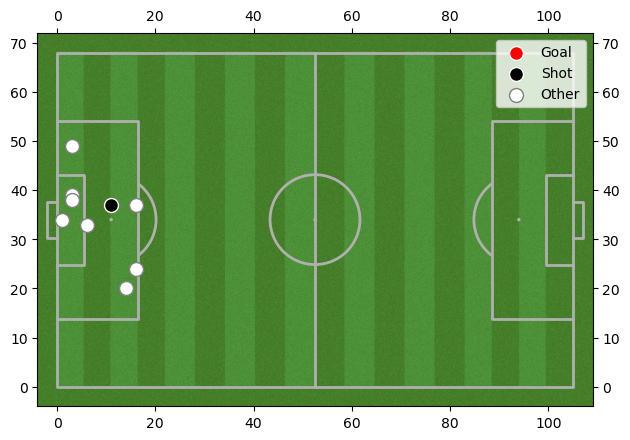

In [66]:

# Filter by outcome
corners_goal = team_corners[team_corners['07 - Outcome'] == 'Goal']
corners_shot = team_corners[team_corners['07 - Outcome'] == 'Shot']
corners_other = team_corners[
    (team_corners['07 - Outcome'] != 'Goal') & 
    (team_corners['07 - Outcome'] != 'Shot')
]
# Draw pitch
pitch = Pitch(
    pitch_length=105, pitch_width=68, pitch_type='uefa',
    pitch_color='grass', stripe=True, goal_type='box',
    #half=True, 
    label=True, axis=True, tick=True
)
fig, ax = pitch.draw()

# Plot Goal events in red
ax.scatter(
    corners_goal['15 - End location X'],
    corners_goal['16 - End location Y'],
    c='red', s=100, edgecolors='white', label='Goal'
)

# Plot Shot events in black
ax.scatter(
    corners_shot['15 - End location X'],
    corners_shot['16 - End location Y'],
    c='black', s=100, edgecolors='white', label='Shot'
)

# Plot all other events in white
ax.scatter(
    corners_other['15 - End location X'],
    corners_other['16 - End location Y'],
    c='white', s=100, edgecolors='gray', label='Other'
)

# Add legend and show
plt.legend()
plt.show()

<Axes: xlabel='10 - Players'>

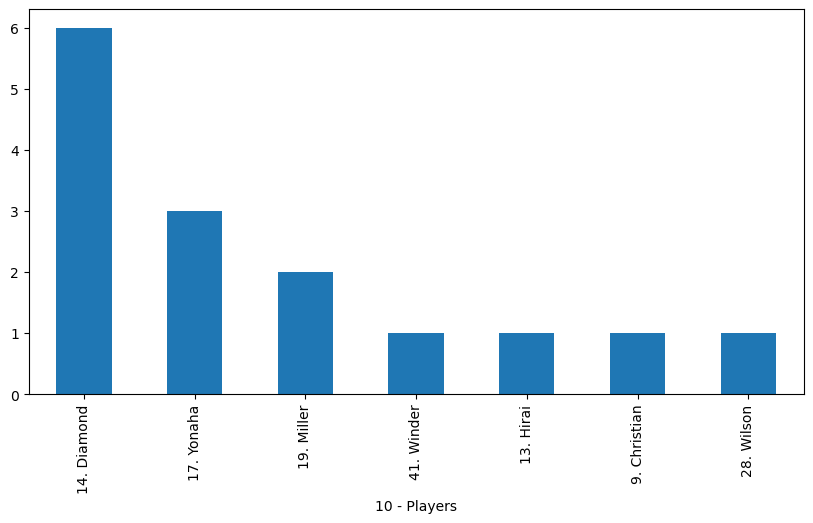

In [67]:
# Who parricipated in corner kicks the most?
team_corners['10 - Players'].str.split(',')\
    .explode().str.strip()\
    .value_counts()\
    .plot(kind='bar', figsize=(10, 5))

## Goal kicks

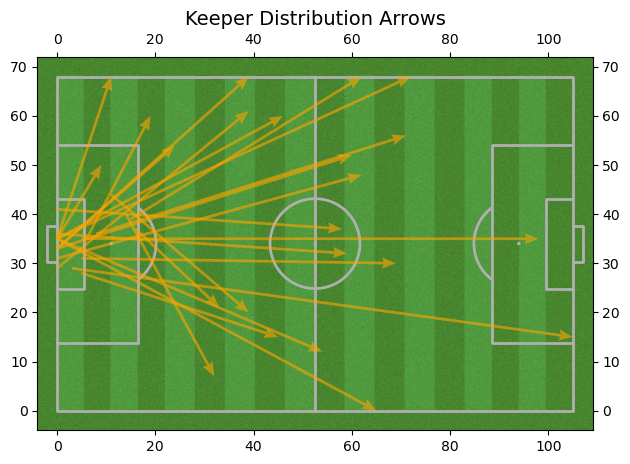

In [68]:
team_keep_distribution = team_data[(team_data['code']=='Utah St. Aggies - Goalkeeper distributions')]

# Draw pitch
pitch = Pitch(
    pitch_length=105, pitch_width=68, pitch_type='uefa',
    pitch_color='grass', stripe=True, goal_type='box',
    #half=True, 
    label=True, axis=True, tick=True
)
fig, ax = pitch.draw()

# Draw arrows
pitch.arrows(
    xstart=team_keep_distribution['11 - Start location X'],
    ystart=team_keep_distribution['12 - Start location Y'],
    xend=team_keep_distribution['15 - End location X'],
    yend=team_keep_distribution['16 - End location Y'],
    color='orange',
    ax=ax,
    width=2,
    headwidth=4,
    alpha=0.6,
    zorder=3
)

plt.title("Keeper Distribution Arrows", fontsize=14)
plt.show()

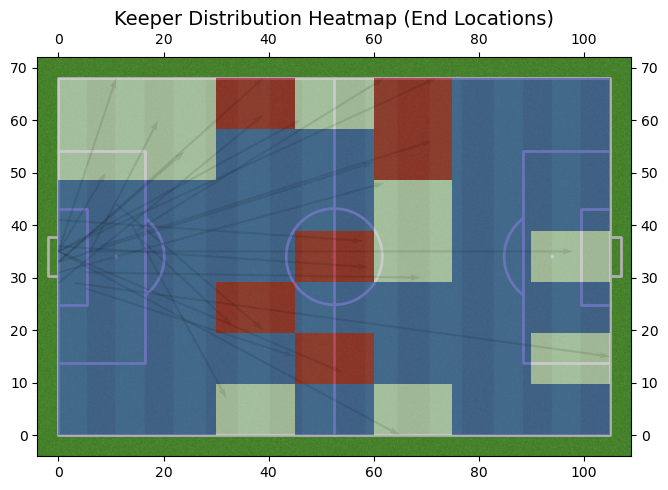

In [69]:
# Extract coordinates
x_start = team_keep_distribution['11 - Start location X']
y_start = team_keep_distribution['12 - Start location Y']
x_end = team_keep_distribution['15 - End location X']
y_end = team_keep_distribution['16 - End location Y']

# Set up the pitch
pitch = Pitch(
    pitch_length=105, pitch_width=68, pitch_type='uefa',
    pitch_color='grass', stripe=True, goal_type='box',
    label=True, axis=True, tick=True
)

fig, ax = pitch.draw(figsize=(8, 5))

# Plot heatmap of start locations
bin_stat = pitch.bin_statistic(x_end, y_end, statistic='count', bins=(7, 7))
pitch.heatmap(bin_stat, ax=ax, cmap='coolwarm', alpha=0.6)

# Optional: overlay arrows (lighter and less prominent)
pitch.arrows(
    xstart=x_start,
    ystart=y_start,
    xend=x_end,
    yend=y_end,
    color='black',
    ax=ax,
    width=1.5,
    headwidth=3,
    alpha=0.1,   # Lower alpha to avoid clutter
    zorder=2
)

# Title
plt.title("Keeper Distribution Heatmap (End Locations)", fontsize=14)
plt.show()


<Axes: xlabel='10 - Players'>

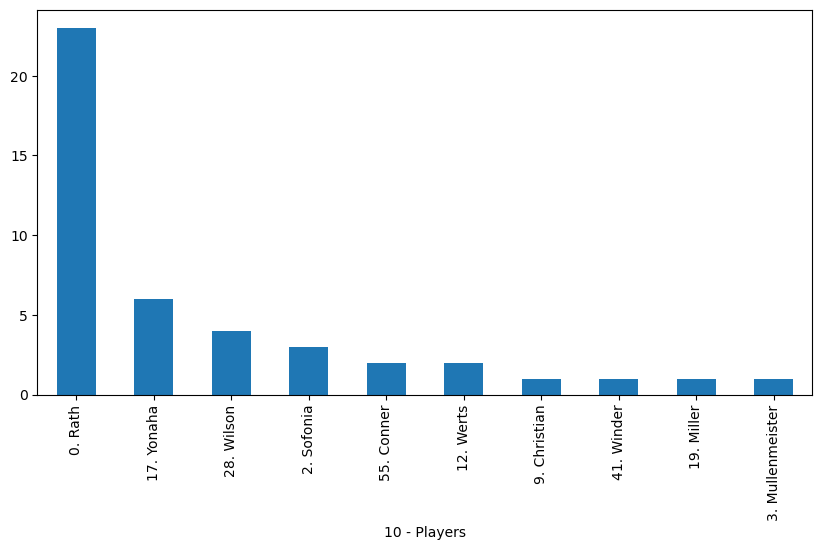

In [70]:
team_keep_distribution['10 - Players'].str.split(',')\
    .explode().str.strip()\
    .value_counts()\
    .plot(kind='bar', figsize=(10, 5))

## Player data keep distribution receiver

In [71]:
pd.set_option('display.max_rows', None)
player_data.head(100)

,ID,Player Code,Start Time,End Time,Action Type,Additional Labels,Team
0,1,7. Chambers,5.533709,10.533709,Pass,"Forward pass, Short or medium pass",Utah State
1,2,14. Diamond,7.406686,13.585422,Pass,"Lateral pass, Long pass",Utah State
2,3,12. Werts,11.585422,15.585422,Duel,"Dribble, Ground duel, Offensive duel, Carry",Utah State
3,4,12. Werts,9.456539,28.903494,Pass,"Cross, Lateral pass, Loss",Utah State
4,5,1. Fitzgerald,15.510936,19.510936,Interception,"Goalkeeper action, Recovery, Carry",Washington State
5,6,1. Fitzgerald,25.903494,31.850897,Pass,"Forward pass, Goalkeeper action, Long pass, Progressive pass",Washington State
6,7,21. Young,28.850897,35.203911,Pass,"Back pass, Loss, Short or medium pass",Washington State
7,8,12. Werts,32.203911,37.203911,Pass,"Recovery, Short or medium pass",Utah State
8,9,7. Chambers,33.614384,38.614384,Pass,"Back pass, Short or medium pass",Utah State
9,10,14. Diamond,35.678941,39.678941,Duel,"Ground duel, Offensive duel, Carry",Utah State


In [74]:
results = []

# Loop through all rows in the original DataFrame
for i in range(len(player_data) - 1):  # stop 1 row before the end
    row = player_data.iloc[i]
    next_row = player_data.iloc[i + 1]

    # Step 1: only consider Utah Valley Goal kicks
    if row['Action Type'] == "Goal kick" and row['Team'] == "Utah State":
        receiver = next_row['Player Code']
        receiver_team = next_row['Team']

        # Step 2: only track Funn or Owens as GK receivers
        if receiver in ["17. Yonaha", "28. Wilson"] and receiver_team == "Utah State":
            # Step 3: scan forward to find next Utah Valley player
            for j in range(i + 2, len(player_data)):
                next_player = player_data.iloc[j]
                next_team = next_player['Team']

                if next_team == "Utah State" and next_player['Player Code'] != receiver:
                    next_receiver = next_player['Player Code']
                    results.append((receiver, next_receiver))
                    break  # stop at first UVU teammate

# Convert results to DataFrame and summarize
df_chain = pd.DataFrame(results, columns=['GK Receiver', 'Next Receiver'])
summary = df_chain.value_counts().reset_index(name="Count")
print(summary)


  GK Receiver Next Receiver  Count
0  17. Yonaha    2. Sofonia      2
1  17. Yonaha    28. Wilson      2
2  28. Wilson    17. Yonaha      1
3  28. Wilson  9. Christian      1
